Python: 3.12.11 | OS: Windows 11
CWD: C:\Users\sinan\dsci510_fall2025_final_project\src
DATA: C:\Users\sinan\dsci510_fall2025_final_project\data
DOC: C:\Users\sinan\dsci510_fall2025_final_project\doc
RESULTS: C:\Users\sinan\dsci510_fall2025_final_project\results
Kaggle creds status: env


**Running `data_collection.py`...**

API key loaded: True
Starting RAWG data collection (unfiltered)...

  1000 games collected so far
  2000 games collected so far
  3000 games collected so far
  4000 games collected so far
  5000 games collected so far
  6000 games collected so far
  7000 games collected so far
  7000 games collected so far
  8000 games collected so far
  9000 games collected so far
  10000 games collected so far

Collection complete.
Total collected: 10000
Saved RAWG dataset: C:\Users\sinan\dsci510_fall2025_final_project\data\rawg_10000_unfiltered.csv
Dataset URL: https://www.kaggle.com/datasets/nikdavis/steam-store-games
Dataset URL: https://www.kaggle.com/datasets/gregorut/videogamesales
steam.csv shape: (27075, 18)
vgsales.csv shape: (16598, 11)
steam columns (first 15): ['appid', 'name', 'release_date', 'english', 'developer', 'publisher', 'platforms', 'required_age', 'categories', 'genres', 'steamspy_tags', 'achievements', 'positive_ratings', 'negative_ratings', 'average_playtime']
vgsales columns

✅ Finished `data_collection.py`

**Running `data_cleaning_preprocessing.py`...**

Loaded: {'rawg': (10000, 5), 'steam': (27075, 18), 'sales': (16598, 11)}
Post-canonicalization: {'rawg': (3737, 6), 'steam': (26822, 19), 'sales': (10616, 12)}
Post-year-filter: {'rawg': (2791, 7), 'steam': (26818, 20), 'sales': (8903, 12)}
After Steam filters: (6097, 20)
Saved: rawg_clean.csv steam_clean.csv vgsales_clean.csv


✅ Finished `data_cleaning_preprocessing.py`

**Running `main.py`...**

RAWG dataset: (2791, 7)
Steam dataset: (6097, 20)
Sales dataset: (8903, 12)


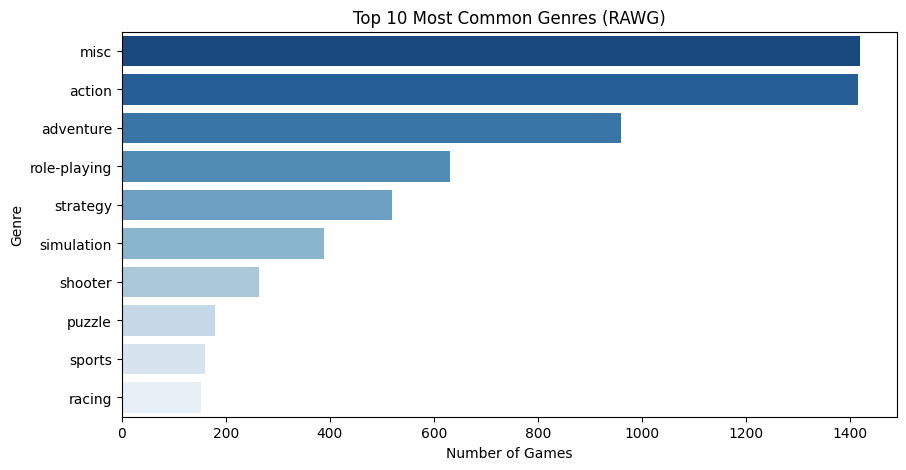

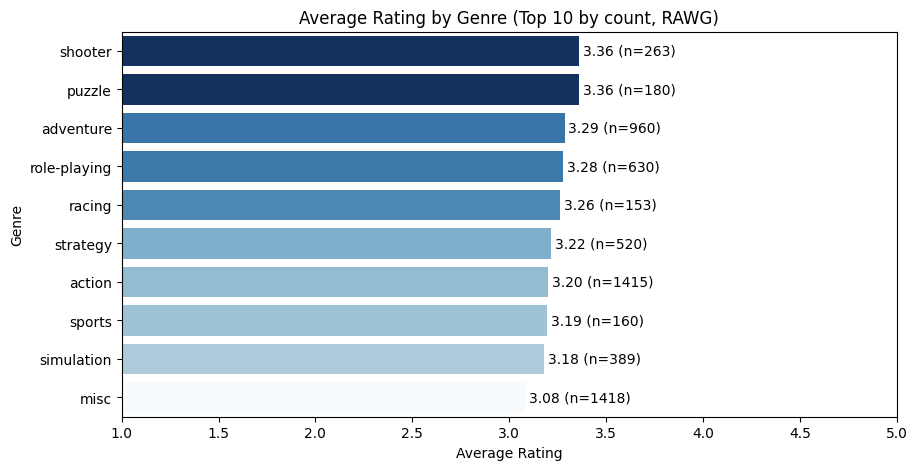

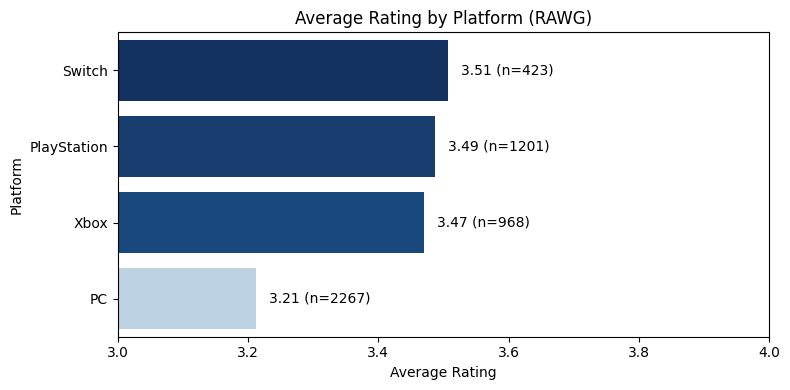

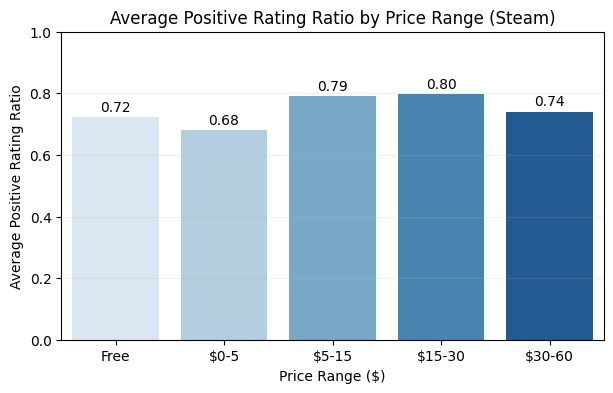

Correlation between price and average positive rating ratio: 0.189 (n=6,073)
Average positive rating ratio by review-volume bucket:
  review_bucket  pos_ratio  n_games
0          <100      0.627     1066
1       100-999      0.718     2685
2        1,000+      0.810     2346


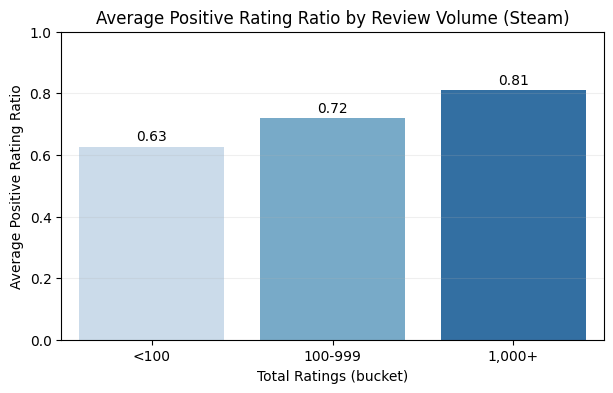

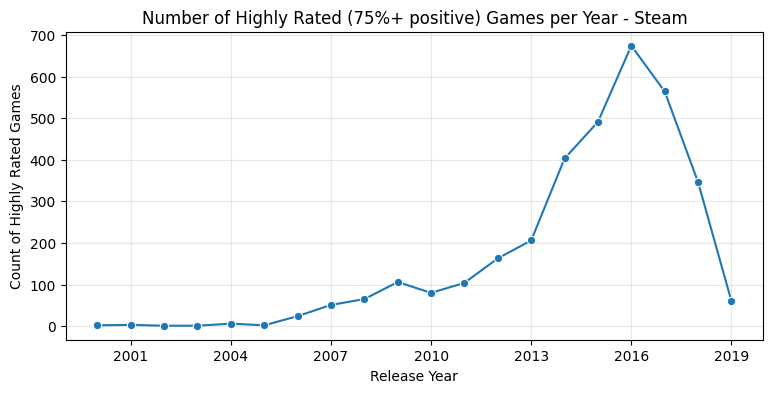

Top years by count of highly rated games:
 year  highly_rated_count
 2016                 674
 2017                 564
 2015                 491
 2014                 403
 2018                 346
 2013                 206
 2012                 163
 2009                 106
 2011                 104
 2010                  80


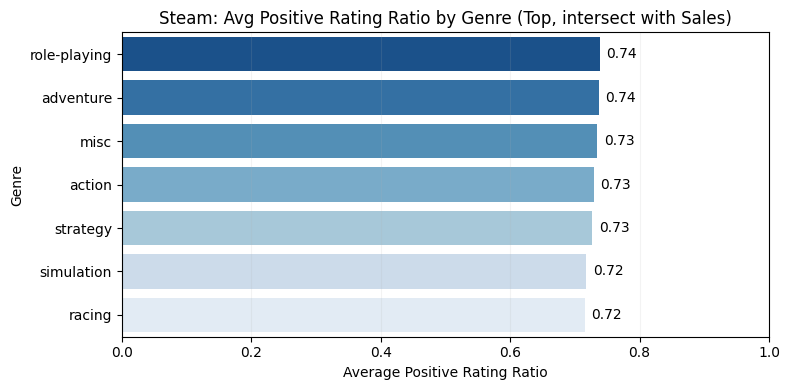

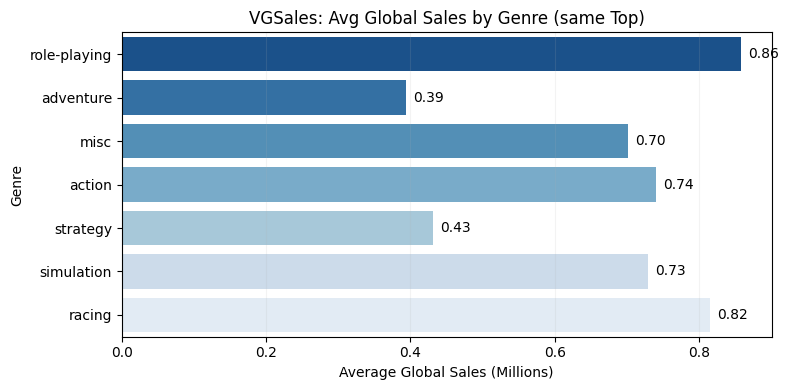

Correlation (genre avg Steam positive ratio vs avg global sales): -0.324   (n=8)
Best alpha: 10
Best CV R2: 0.219
Test R2:  0.255
Test RMSE:0.150

Feature |coef| ranking:
Total ratings (log)    0.115479
Owners (log)           0.068167
Price ($30-60)         0.020473
Price (log)            0.019577
year                   0.014584
Price ($5-15)          0.008604
Price ($15-30)         0.008431
is_free                0.006824
Genre cluster          0.004182
median_playtime        0.002270
Price ($0-5)           0.001556
dtype: float64


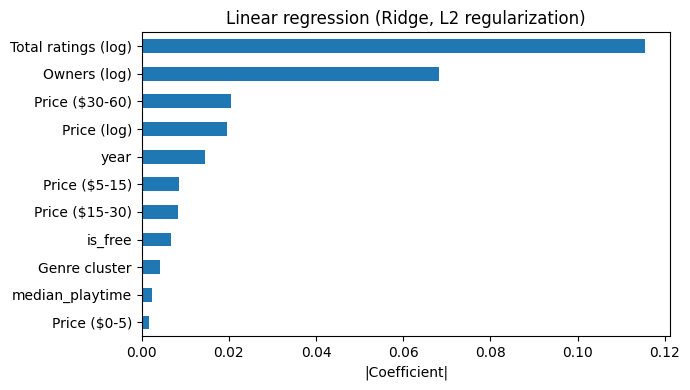

✅ Finished `main.py`

In [1]:
import os, sys, platform
from pathlib import Path
from IPython.display import Markdown, display

# Detect whether notebook is run from project root or from src/
if Path("data_collection.py").exists() and Path("main.py").exists():
    SRC = Path.cwd()
elif Path("src/data_collection.py").exists():
    %cd src
    SRC = Path.cwd()
else:
    raise SystemExit("Open this notebook from the project root or from src/.")

ROOT    = SRC.parent
DATA    = ROOT / "data"
RESULTS = ROOT / "results"
DOC     = ROOT / "doc"

# make sure folders exist locally (they are git ignored)
DATA.mkdir(parents=True, exist_ok=True)
RESULTS.mkdir(parents=True, exist_ok=True)
DOC.mkdir(parents=True, exist_ok=True)

print("Python:", sys.version.split()[0], "| OS:", platform.system(), platform.release())
print("CWD:", SRC)
print("DATA:", DATA)
print("DOC:", DOC)
print("RESULTS:", RESULTS)

from dotenv import load_dotenv
load_dotenv(ROOT / ".env")
sys.path.append(str(SRC))

from config import ensure_kaggle_creds

def run(script: str):
    """Run a project script and show a short status message."""
    display(Markdown(f"**Running `{script}`...**"))
    %run -i {script}
    display(Markdown(f"✅ Finished `{script}`"))

# Check Kaggle creds early so the grader sees a clear message
try:
    status = ensure_kaggle_creds()
    print("Kaggle creds status:", status)
except Exception as e:
    print("Kaggle credentials not found or invalid.")
    print("Full pipeline (data_collection) may fail until creds are configured.")
    # you can choose to raise here if you want to force it:
    # raise

# 1) Collect raw data (RAWG + Kaggle: Steam + VGSales)
run("data_collection.py")

# 2) Clean / standardize
run("data_cleaning_preprocessing.py")

# 3) Analysis + charts
run("main.py")
